In [42]:
import pandas
import numpy
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pandas.read_parquet("../../data/fsq_osm_filtered_5.parquet")
print(data.columns)

Index(['fsq_place_id', 'fsq_name', 'fsq_latitude', 'fsq_longitude',
       'fsq_address', 'fsq_locality', 'fsq_region', 'fsq_postcode',
       'fsq_admin_region', 'fsq_post_town', 'fsq_po_box', 'fsq_country',
       'fsq_date_created', 'fsq_date_refreshed', 'fsq_date_closed', 'fsq_tel',
       'fsq_website', 'fsq_email', 'fsq_facebook_id', 'fsq_instagram',
       'fsq_twitter', 'fsq_category_ids', 'fsq_category_labels',
       'fsq_placemaker_url', 'fsq_unresolved_flags', 'fsq_bbox', 'fsq_geom',
       'osm_id', 'osm_class', 'osm_type', 'osm_name', 'osm_address',
       'osm_extratags', 'osm_geometry', 'osm_latitude', 'osm_longitude',
       'osm_geom', 'fsq_osm_name_similarity_score', 'fsq_osm_distance'],
      dtype='object')


In [44]:
if not os.path.exists("../../data/fsq_osm_filtered_5_map.csv"):
    # map_data = data[["fsq_latitude", "fsq_longitude"]]
    # map_data.to_csv("../../data/fsq_osm_filtered_5_map.csv", index=False)
    pass

In [45]:
def _finish_plot(save_path):
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
        plt.close()
    else:
        plt.show()

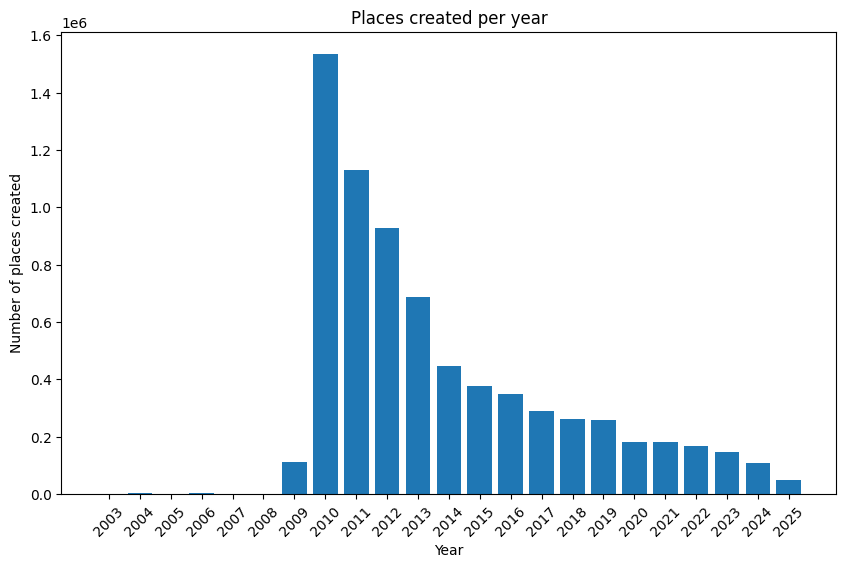

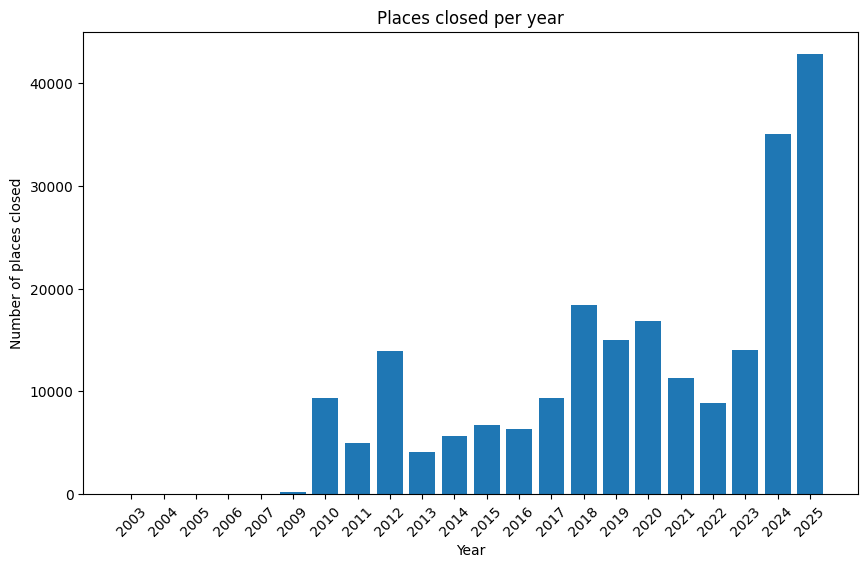

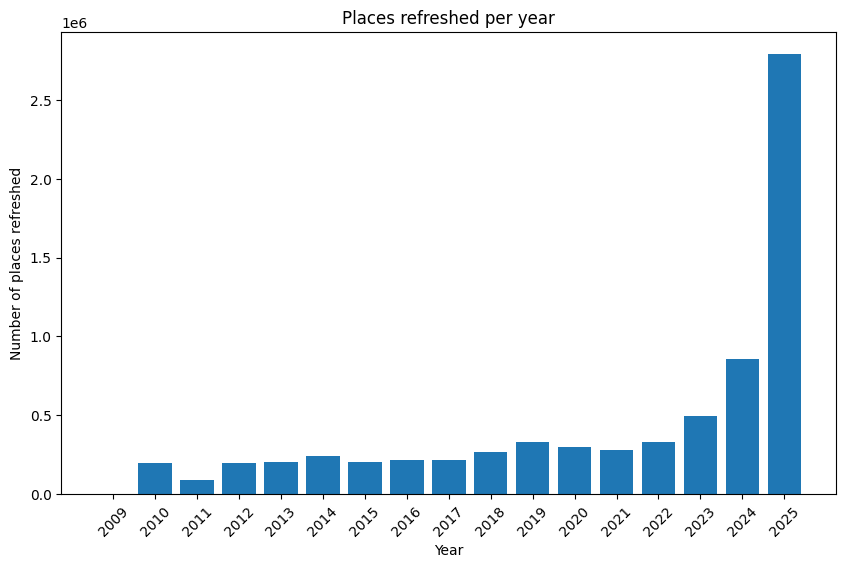

In [46]:
def plot_count_per_year(df, col='fsq_date_created', save_path=None):
    dates = pandas.to_datetime(df[col], errors='coerce', utc=True).dropna()
    counts = dates.dt.year.value_counts().sort_index()
    plt.figure(figsize=(10,6))
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel("Year")
    plt.ylabel(f"Number of places {col.split('_')[-1]}")
    plt.title(f"Places {col.split('_')[-1]} per year")
    plt.xticks(rotation=45)
    _finish_plot(save_path)
plot_count_per_year(data, col='fsq_date_created')
plot_count_per_year(data, col='fsq_date_closed')
plot_count_per_year(data, col='fsq_date_refreshed')

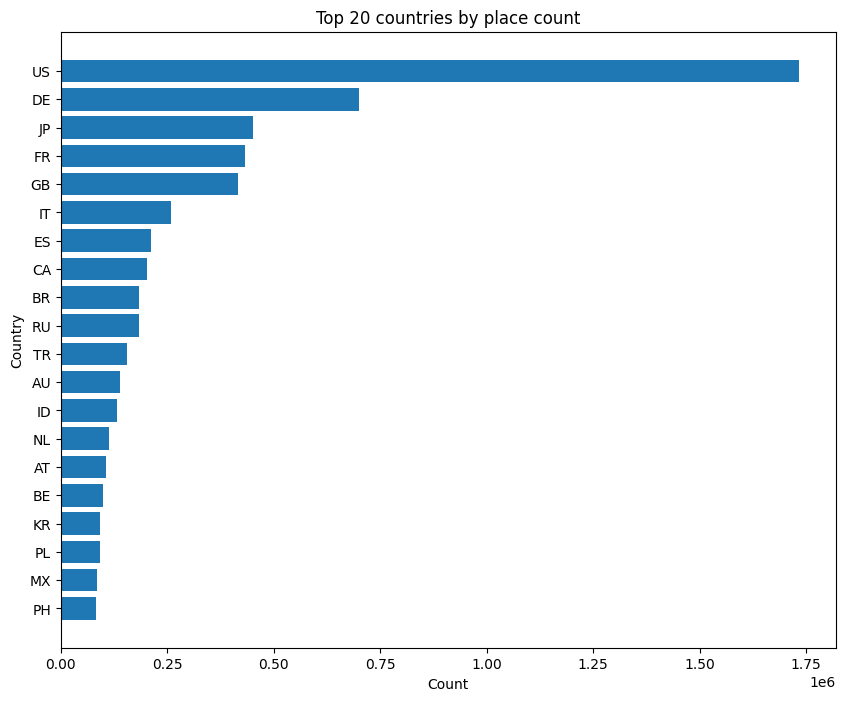

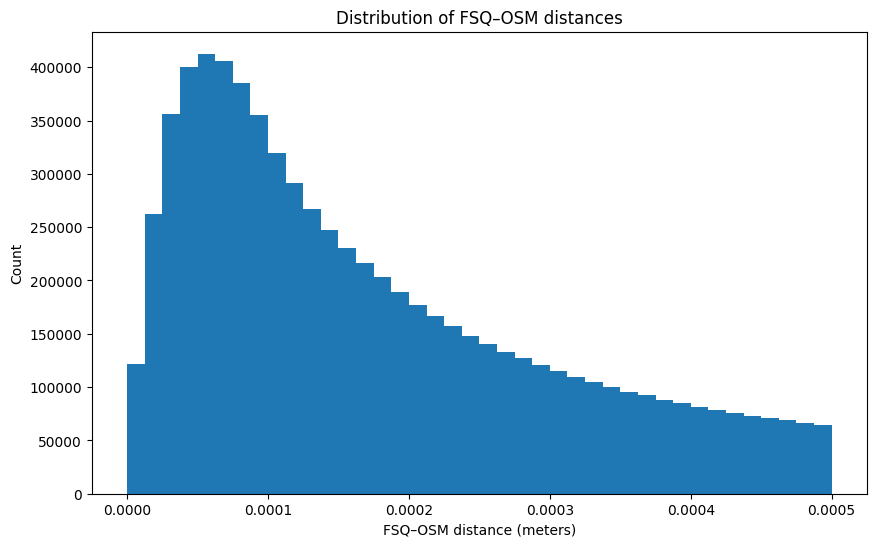

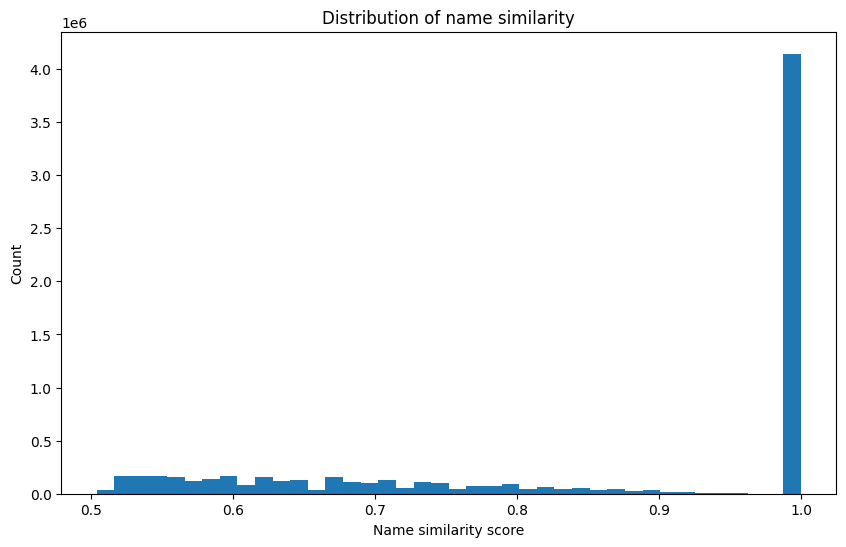

In [47]:
def plot_created_over_time(df, save_path=None):
    dates = pandas.to_datetime(df['fsq_date_created'], errors='coerce', utc=True).dropna()
    counts = dates.dt.to_period("M").value_counts().sort_index()
    x = counts.index.to_timestamp()  # monthly ticks
    y = counts.values
    plt.figure(figsize=(12,6))
    plt.plot(x, y, marker="o")
    plt.xlabel("Month")
    plt.ylabel("Number of places created")
    plt.title("Places created over time")
    _finish_plot(save_path)

def plot_refreshed_over_time(df, save_path=None):
    dates = pandas.to_datetime(df['fsq_date_refreshed'], errors='coerce', utc=True).dropna()
    counts = dates.dt.to_period("M").value_counts().sort_index()
    x = counts.index.to_timestamp()
    y = counts.values
    plt.figure(figsize=(12,6))
    plt.plot(x, y, marker="o")
    plt.xlabel("Month")
    plt.ylabel("Number of places refreshed")
    plt.title("Places refreshed over time")
    _finish_plot(save_path)

def plot_closed_over_time(df, save_path=None):
    dates = pandas.to_datetime(df['fsq_date_closed'], errors='coerce', utc=True).dropna()
    if dates.empty:
        print("No valid fsq_date_closed rows to plot.")
        return
    counts = dates.dt.to_period("M").value_counts().sort_index()
    x = counts.index.to_timestamp()
    y = counts.values
    plt.figure(figsize=(12,6))
    plt.plot(x, y, marker="o")
    plt.xlabel("Month")
    plt.ylabel("Number of places closed")
    plt.title("Places closed over time")
    _finish_plot(save_path)

def plot_distance_hist(df, save_path=None):
    s = pandas.to_numeric(df['fsq_osm_distance'], errors='coerce').dropna()
    plt.figure(figsize=(10,6))
    plt.hist(s, bins=40)
    plt.xlabel("FSQ–OSM distance (meters)")
    plt.ylabel("Count")
    plt.title("Distribution of FSQ–OSM distances")
    _finish_plot(save_path)

def plot_name_similarity_hist(df, save_path=None):
    s = pandas.to_numeric(df['fsq_osm_name_similarity_score'], errors='coerce').dropna()
    plt.figure(figsize=(10,6))
    plt.hist(s, bins=40)
    plt.xlabel("Name similarity score")
    plt.ylabel("Count")
    plt.title("Distribution of name similarity")
    _finish_plot(save_path)

def plot_country_distribution(df, save_path=None, top_n=20):
    counts = df['fsq_country'].dropna().astype(str).value_counts().head(top_n)
    plt.figure(figsize=(10,8))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.title(f"Top {len(counts)} countries by place count")
    _finish_plot(save_path)

def plot_lat_lon_scatter(df, save_path=None, sample=50000):
    sub = df[['fsq_latitude','fsq_longitude','osm_latitude','osm_longitude']].dropna()
    if len(sub) > sample:
        sub = sub.sample(sample, random_state=42)
    plt.figure(figsize=(8,8))
    plt.scatter(sub['osm_longitude'], sub['osm_latitude'], s=5, alpha=1, label="OSM")
    plt.scatter(sub['fsq_longitude'], sub['fsq_latitude'], s=15, alpha=1, label="FSQ")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("FSQ vs OSM locations")
    plt.legend()
    _finish_plot(save_path)


plot_country_distribution(data)
plot_distance_hist(data)
plot_name_similarity_hist(data)

/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


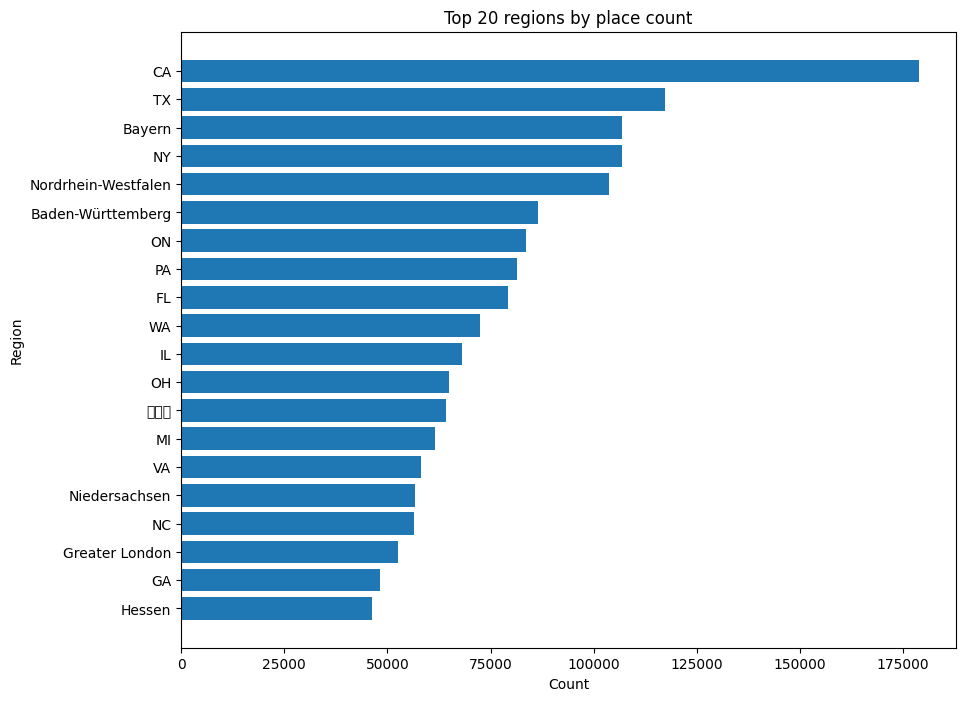

/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38442 (\N{CJK UNIFIED IDEOGRAPH-962A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/share/virtualenvs/f-osm-knaXSPgc/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amiri/.local/

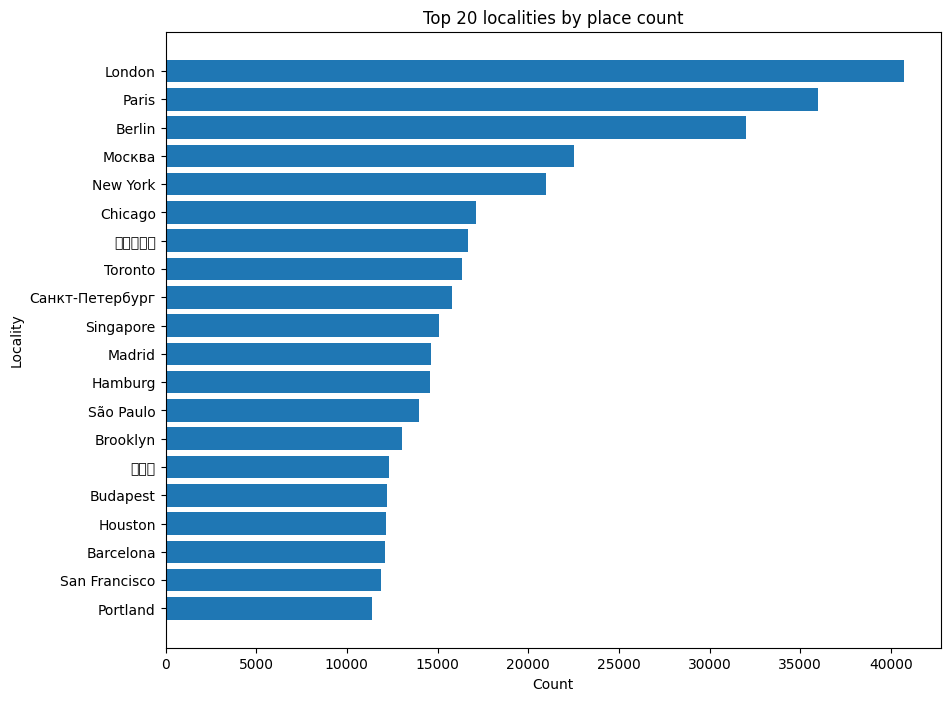

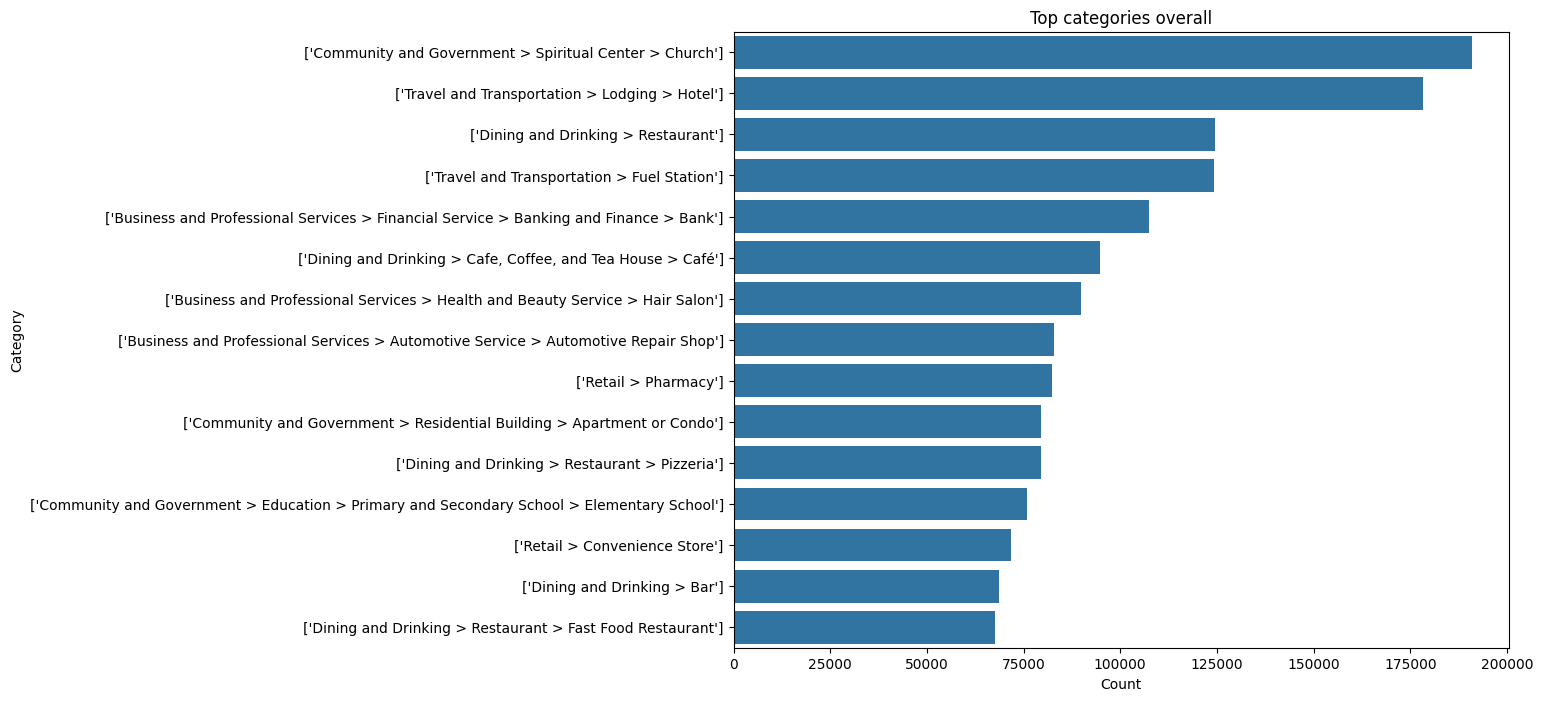

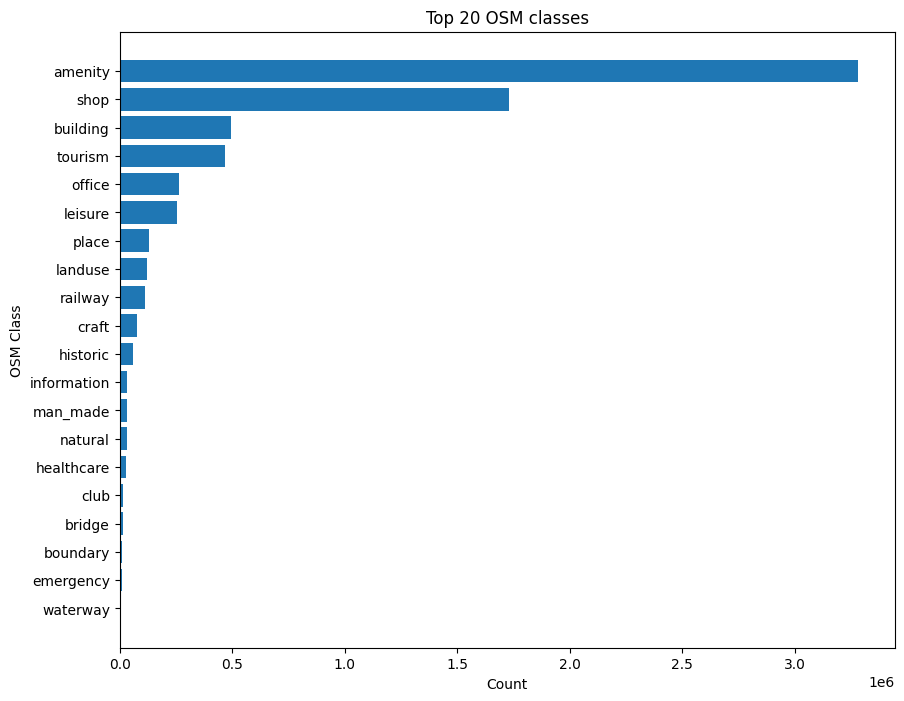

In [49]:


def plot_region_distribution(df, save_path=None, top_n=20):
    counts = df['fsq_region'].dropna().astype(str).value_counts().head(top_n)
    plt.figure(figsize=(10,8))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.xlabel("Count")
    plt.ylabel("Region")
    plt.title(f"Top {len(counts)} regions by place count")
    _finish_plot(save_path)

def plot_locality_distribution(df, save_path=None, top_n=20):
    counts = df['fsq_locality'].dropna().astype(str).value_counts().head(top_n)
    plt.figure(figsize=(10,8))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.xlabel("Count")
    plt.ylabel("Locality")
    plt.title(f"Top {len(counts)} localities by place count")
    _finish_plot(save_path)

def plot_category_by_country(df, save_path=None, country=None, top_n=15):
    sub = df.dropna(subset=['fsq_country', 'fsq_category_labels'])
    if country:
        sub = sub[sub['fsq_country'] == country]
    cats = sub['fsq_category_labels'].astype(str)
    counts = cats.value_counts().head(top_n)
    plt.figure(figsize=(10,8))
    sns.barplot(y=counts.index, x=counts.values, orient="h")
    title = f"Top {len(counts)} categories in {country}" if country else "Top categories overall"
    plt.title(title)
    plt.xlabel("Count")
    plt.ylabel("Category")
    _finish_plot(save_path)

def plot_osm_class_distribution(df, save_path=None, top_n=20):
    counts = df['osm_class'].dropna().astype(str).value_counts().head(top_n)
    plt.figure(figsize=(10,8))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.xlabel("Count")
    plt.ylabel("OSM Class")
    plt.title(f"Top {len(counts)} OSM classes")
    _finish_plot(save_path)

def plot_distance_vs_similarity(df, save_path=None, sample=50000):
    sub = df[['fsq_osm_distance', 'fsq_osm_name_similarity_score']].dropna()
    if len(sub) > sample:
        sub = sub.sample(sample, random_state=42)
    plt.figure(figsize=(10,6))
    plt.scatter(sub['fsq_osm_distance'], sub['fsq_osm_name_similarity_score'], alpha=0.4, s=10)
    plt.xscale("log") 
    plt.xlabel("FSQ–OSM distance (log scale)")
    plt.ylabel("Name similarity score")
    plt.title("Distance vs Name similarity")
    _finish_plot(save_path)

def plot_created_vs_closed(df, save_path=None):
    created = pandas.to_datetime(df['fsq_date_created'], errors='coerce', utc=True).dropna()
    closed = pandas.to_datetime(df['fsq_date_closed'], errors='coerce', utc=True).dropna()

    created_counts = created.dt.to_period("M").value_counts().sort_index()
    closed_counts = closed.dt.to_period("M").value_counts().sort_index()

    plt.figure(figsize=(12,6))
    plt.plot(created_counts.index.to_timestamp(), created_counts.values, label="Created", marker="o")
    plt.plot(closed_counts.index.to_timestamp(), closed_counts.values, label="Closed", marker="x")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.title("Places Created vs Closed Over Time")
    plt.legend()
    _finish_plot(save_path)



plot_region_distribution(data)
plot_locality_distribution(data)
plot_category_by_country(data)
plot_osm_class_distribution(data)

